<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Chapter3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-4 선형 회귀를 위한 뉴런 만들기 

## 문제 해결을 위한 당뇨병 환자 데이터 준비
1. 데이터셋 불러오기 

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


2. 데이터셋 살펴보기

In [5]:
diabetes.data[:3]  # numpy 슬라이싱은 문서 참조 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [6]:
diabetes.feature_names  # 나이(age) 성별(sex) 체질량지수(bmi) 혈압(bp), 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
x = diabetes.data[:, 2]  # 전체 샘플을 선택 (: 은 all의 의미) 하고 3번째 열(bmi)를 가져옴 
y = diabetes.target  # 혈당량 

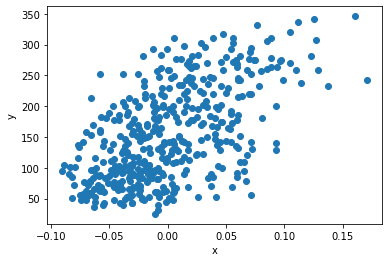

In [8]:
import matplotlib.pyplot as plt 
plt.scatter (x, y) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0 
  
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat 

  def backprop(self, x, err):
    w_grad = x * err 
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad 
        self.b -= b_grad 

In [13]:
neuron = Neuron()
neuron.fit(x, y) 

Text(0, 0.5, 'y')

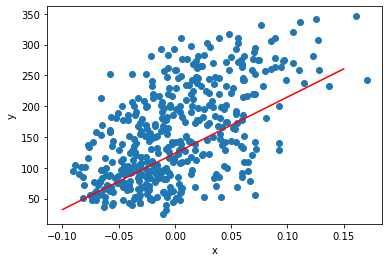

In [16]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')